<a href="https://www.kaggle.com/mohamedbakrey/mnist-using-different-models-in-deep-learning?scriptVersionId=88320011" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [43]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow import keras
from tensorflow.keras.datasets import mnist
from tensorflow.keras import layers
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.utils import to_categorical, plot_model

# Loading Data

In [44]:
# load mnist dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [45]:
print("Train Data:", x_train.shape)
print("Train Data:", y_train.shape)
print("Train Data:", x_test.shape)
print("Train Data:", y_test.shape)

Train Data: (60000, 28, 28)
Train Data: (60000,)
Train Data: (10000, 28, 28)
Train Data: (10000,)


# compute the number of labels

In [46]:
# compute the number of labels
num_labels = len(np.unique(y_train))

In [47]:
print("Number Of Labels:",num_labels)

Number Of Labels: 10


In [48]:
# convert to one-hot vector
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [49]:
print("Train after make To_Categorical:", y_train.shape)
print("Test after make To_Categorical:", y_test.shape)


Train after make To_Categorical: (60000, 10)
Test after make To_Categorical: (10000, 10)


In [50]:
# input image dimensions
image_size = x_train.shape[1]

In [51]:
print("Image Size:", image_size)

Image Size: 28


# Resize and Normalize

In [52]:
# resize and normalize
x_train = np.reshape(x_train,[-1, image_size, image_size, 1])
x_test = np.reshape(x_test,[-1, image_size, image_size, 1])

In [53]:
print("Train After Make Normalize:",x_train.shape)
print("Test After Make Normalize:",x_test.shape)

Train After Make Normalize: (60000, 28, 28, 1)
Test After Make Normalize: (10000, 28, 28, 1)


In [54]:
x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255

In [55]:
print("Train After Make Normalize:",x_train.shape)
print("Test After Make Normalize:",x_test.shape)

Train After Make Normalize: (60000, 28, 28, 1)
Test After Make Normalize: (10000, 28, 28, 1)


# Network Parameters

In [56]:
# network parameters
# image is processed as is (square grayscale)
input_shape = (image_size, image_size, 1)
batch_size = 128
kernel_size = 3
pool_size = 2
filters = 64
dropout = 0.2

# Using CNN 

In [69]:
# model is a stack of CNN-ReLU-MaxPooling
model = Sequential()
model.add(Conv2D(filters=filters,
        kernel_size=kernel_size,
        activation='relu',
        input_shape=input_shape))
model.add(MaxPooling2D(pool_size))
model.add(Conv2D(filters=filters,
        kernel_size=kernel_size,
        activation='relu'))
model.add(MaxPooling2D(pool_size))
model.add(Conv2D(filters=filters,
        kernel_size=kernel_size,
        activation='relu'))
model.add(Flatten())
# dropout added as regularizer
model.add(Dropout(dropout))
# output layer is 10-dim one-hot vector
model.add(Dense(num_labels))
model.add(Activation('softmax'))
model.summary()


Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_23 (Conv2D)           (None, 26, 26, 64)        640       
_________________________________________________________________
max_pooling2d_15 (MaxPooling (None, 13, 13, 64)        0         
_________________________________________________________________
conv2d_24 (Conv2D)           (None, 11, 11, 64)        36928     
_________________________________________________________________
max_pooling2d_16 (MaxPooling (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_25 (Conv2D)           (None, 3, 3, 64)          36928     
_________________________________________________________________
flatten_6 (Flatten)          (None, 576)               0         
_________________________________________________________________
dropout_6 (Dropout)          (None, 576)              

### Plot the Summary by using plot_model

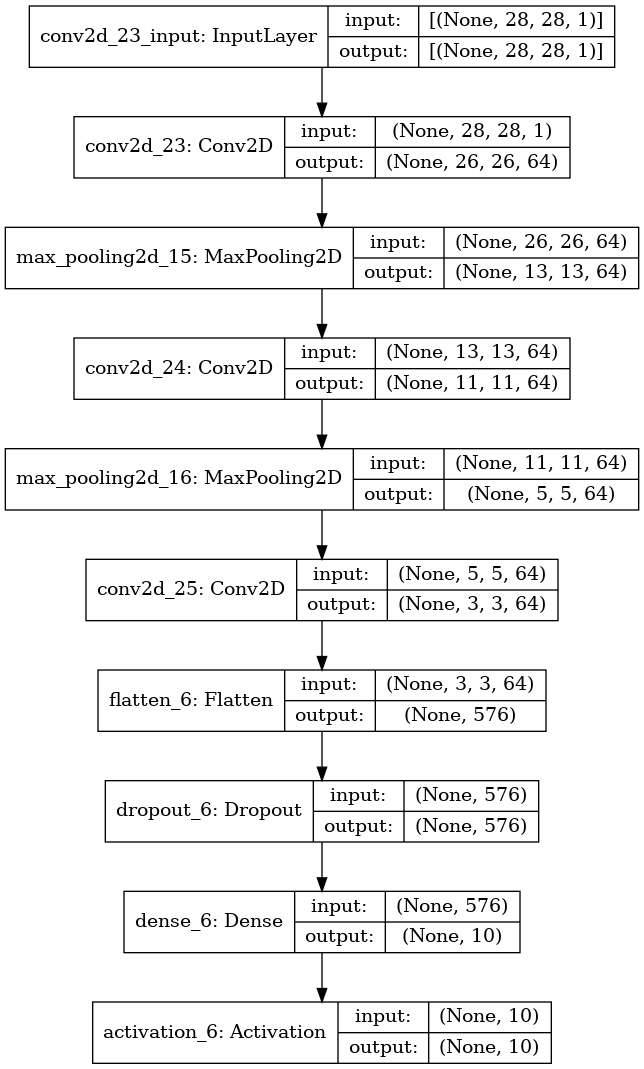

In [70]:
plot_model(model, to_file='cnn-mnist.png', show_shapes=True)

In [76]:
# loss function for one-hot vector
# use of adam optimizer
# accuracy is good metric for classification tasks
model.compile(loss='categorical_crossentropy',
optimizer='rmsprop',
metrics=['accuracy'])

In [77]:
# train the network
model.fit(x_train, y_train, epochs=10, batch_size=batch_size)

Epoch 1/10
469/469 [==============================] - 31s 65ms/step - loss: 0.0160 - accuracy: 0.9950
Epoch 2/10
469/469 [==============================] - 30s 65ms/step - loss: 0.0138 - accuracy: 0.9955
Epoch 3/10
469/469 [==============================] - 30s 65ms/step - loss: 0.0123 - accuracy: 0.9957
Epoch 4/10
469/469 [==============================] - 30s 64ms/step - loss: 0.0111 - accuracy: 0.9961
Epoch 5/10
469/469 [==============================] - 30s 64ms/step - loss: 0.0106 - accuracy: 0.9965
Epoch 6/10
469/469 [==============================] - 30s 64ms/step - loss: 0.0089 - accuracy: 0.9970
Epoch 7/10
469/469 [==============================] - 30s 64ms/step - loss: 0.0086 - accuracy: 0.9973
Epoch 8/10
469/469 [==============================] - 30s 64ms/step - loss: 0.0076 - accuracy: 0.9974
Epoch 9/10
469/469 [==============================] - 30s 65ms/step - loss: 0.0074 - accuracy: 0.9977
Epoch 10/10
469/469 [==============================] - 29s 63ms/step - loss: 0.007

In [78]:
_, acc = model.evaluate(x_test, y_test, batch_size=batch_size)

79/79 [==============================] - 2s 22ms/step - loss: 0.0303 - accuracy: 0.9925


In [79]:
print("\nTest accuracy: %.1f%%" % (100.0 * acc))


Test accuracy: 99.3%
